In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-35, 35, 1000)

# Activation functions

##ReLU та її похідна

In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

##SiLU та її похідна

In [ ]:
def silu(x):
    return x / (1 + np.exp(-x))

def silu_derivative(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid * (1 + x * (1 - sigmoid))

##Mish та її похідна

In [ ]:
def mish(x):
    return x * np.tanh(np.log1p(np.exp(x)))

def mish_derivative(x):
    sp = np.log1p(np.exp(x))
    omega = 4 * (x + 1) + 4 * np.exp(2 * x) + np.exp(3 * x) + np.exp(x) * (4 * x + 6)
    delta = 2 * np.exp(x) + np.exp(2 * x) + 2
    return np.exp(x) * omega / (delta ** 2)

##ELU та її похідна

In [ ]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

##GeLU та її похідна

In [ ]:
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def gelu_derivative(x):
    term = np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))
    return 0.5 * np.tanh(term) + (0.5 * x * (1 - np.tanh(term) ** 2) * np.sqrt(2 / np.pi) * (1 + 0.134145 * np.power(x, 2))) + 0.5


In [ ]:
activation_functions = {
    'ReLU': (relu, relu_derivative),
    'SiLU': (silu, silu_derivative),
    'Mish': (mish, mish_derivative),
    'ELU': (elu, elu_derivative),
    'GeLU': (gelu, gelu_derivative),
}

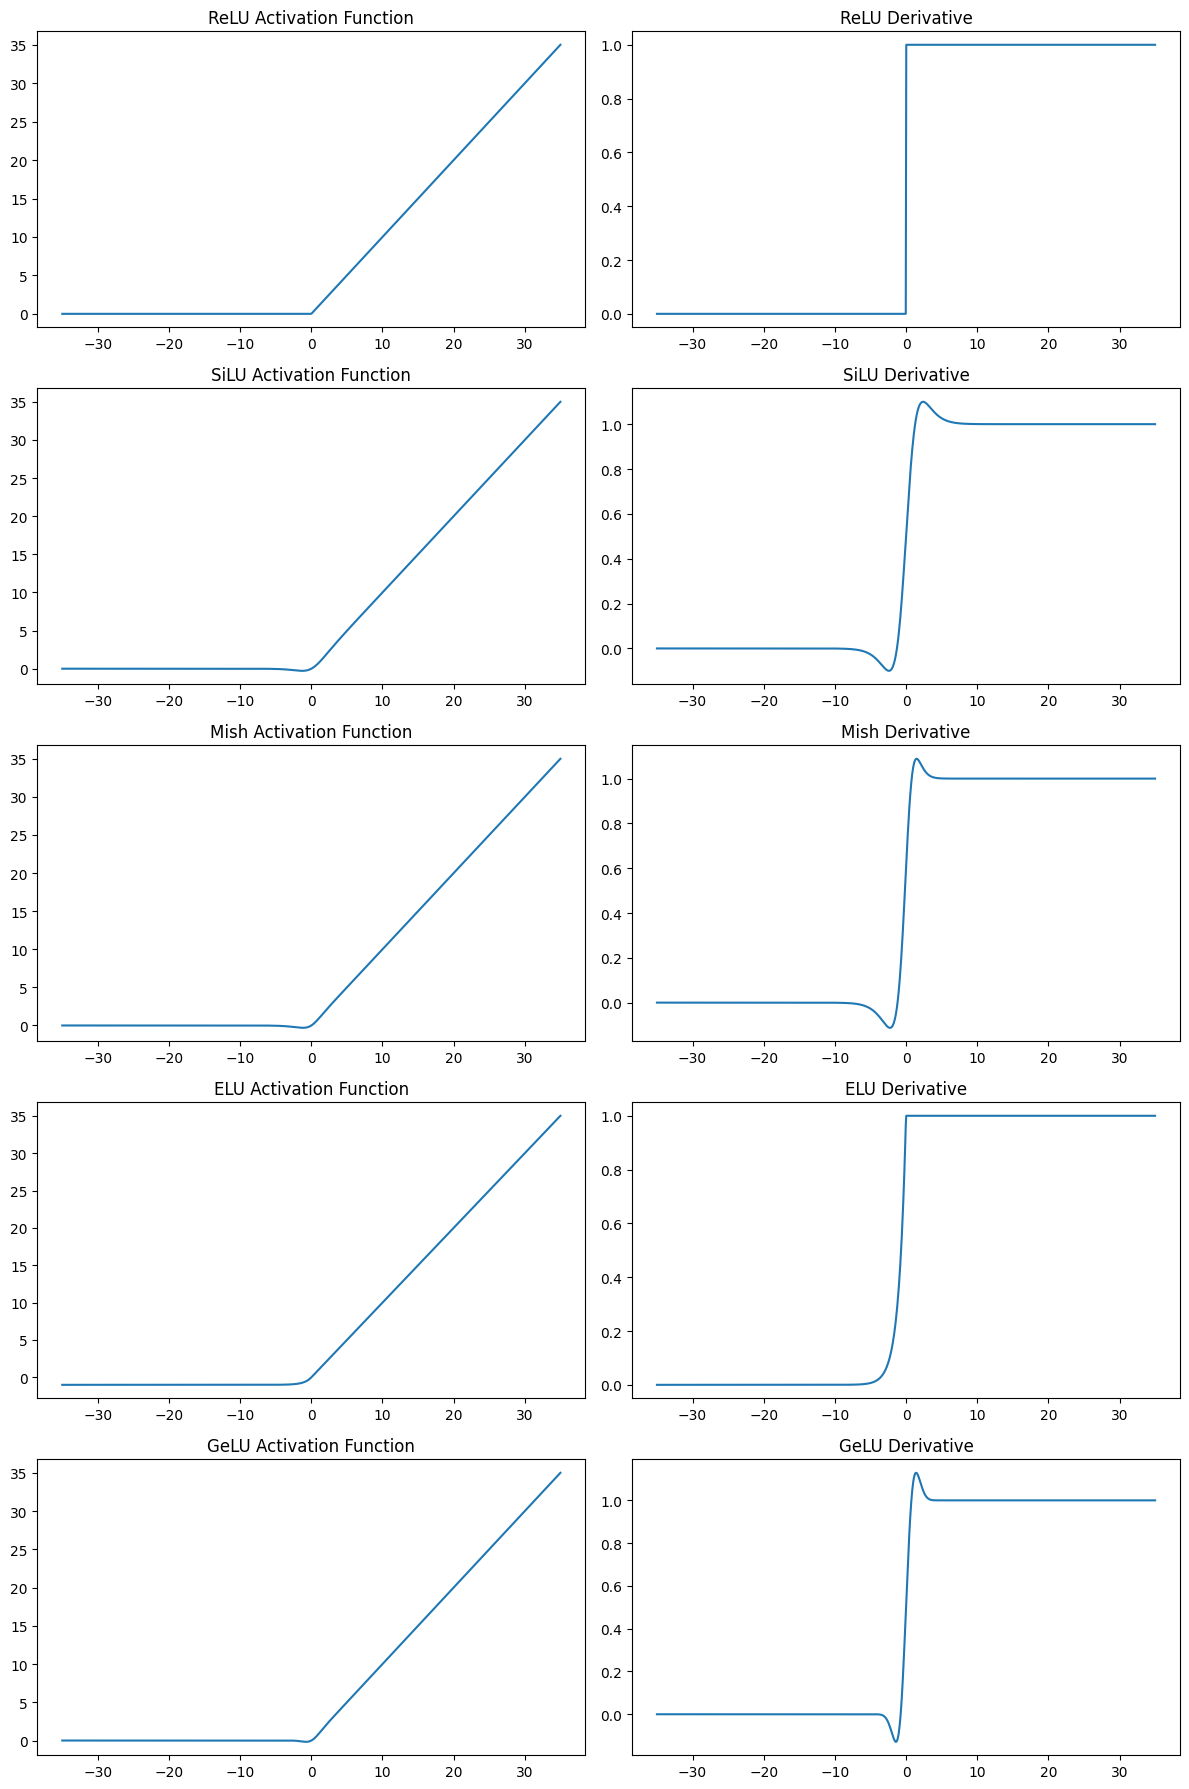

In [ ]:
fig, axes = plt.subplots(len(activation_functions), 2, figsize=(12, 18))

for i, (name, (func, dfunc)) in enumerate(activation_functions.items()):
    axes[i, 0].plot(x, func(x))
    axes[i, 0].set_title(f'{name} Activation Function')

    axes[i, 1].plot(x, dfunc(x))
    axes[i, 1].set_title(f'{name} Derivative')

plt.tight_layout()
plt.show()

# Losses

## Wing

In [ ]:
def wing_loss(y_true, y_pred, w=10, epsilon=2):
    diff_abs = np.abs(y_true - y_pred)
    loss = np.where(diff_abs < w, w * np.log(1 + diff_abs / epsilon), diff_abs - w + w * np.log(1 + w / epsilon))
    return np.mean(loss)

## SmoothL1

In [ ]:
def smooth_l1(y_true, y_pred, beta=1.0):
    diff = np.abs(y_true - y_pred)
    less_than_beta = diff < beta
    loss = np.where(less_than_beta, 0.5 * (diff ** 2) / beta, diff - 0.5 * beta)
    return np.mean(loss)

## L1

In [ ]:
def l1_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

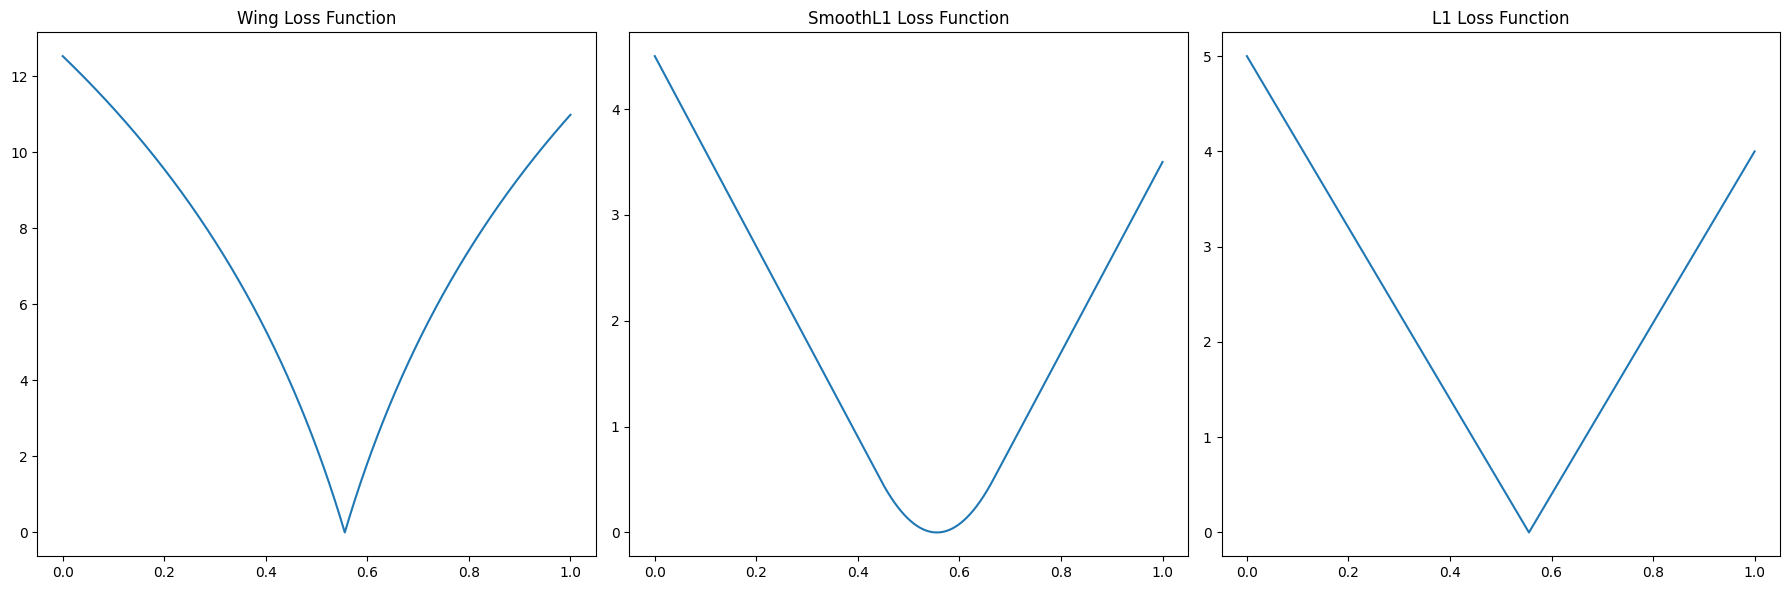

In [ ]:
y_true = np.linspace(-5, 5, 1000)
y_pred = np.linspace(0, 1, 1000)

loss_functions = {
    'Wing': wing_loss,
    'SmoothL1': smooth_l1,
    'L1': l1_loss,
}

fig, ax = plt.subplots(1, len(loss_functions), figsize=(18, 6))

for i, (name, loss_func) in enumerate(loss_functions.items()):
    losses = [loss_func(np.array([t]), np.array([p])) for t, p in zip(y_true, y_pred)]
    ax[i].plot(y_pred, losses)
    ax[i].set_title(f'{name} Loss Function')

plt.tight_layout()
plt.show()